In [1]:
from functions import *
from UNET import *

In [2]:
dataset_path = "./Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
numpy_path = "./augmented_dataset"
torch.manual_seed(8524011162127527122)

In [5]:
generate_dataset(dataset_path, numpy_path, (240,240,40))


Generated 1845 datapoints


In [6]:
dataset = load_dataset(numpy_path)

./augmented_dataset


In [7]:
training_set, validation_set, testing_set = random_split(dataset, (0.8, 0.1, 0.1))
print(len(training_set), len(validation_set), len(testing_set))
print(training_set[0].shape, validation_set[0].shape, testing_set[0].shape)

1477 184 184
(5, 16, 240, 240) (5, 16, 240, 240) (5, 16, 240, 240)


In [8]:
processed_training_set = split_layers(np.array(training_set))
processed_validation_set = split_layers(np.array(validation_set))
processed_testing_set = split_layers(np.array(testing_set))

In [9]:
print(processed_training_set.shape, processed_validation_set.shape, processed_testing_set.shape)

(23632, 5, 240, 240) (2944, 5, 240, 240) (2944, 5, 240, 240)


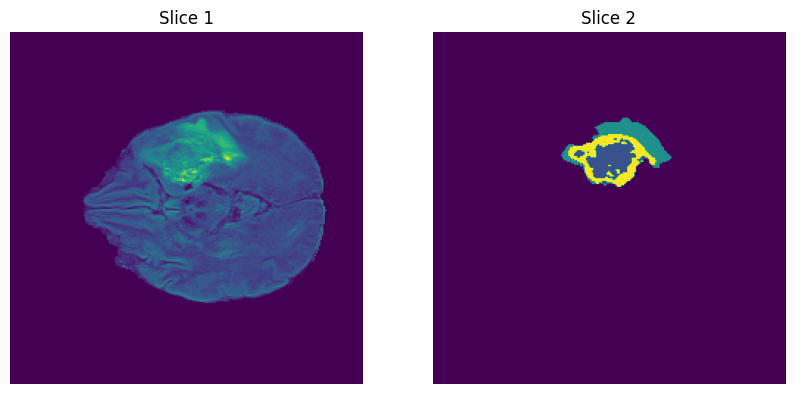

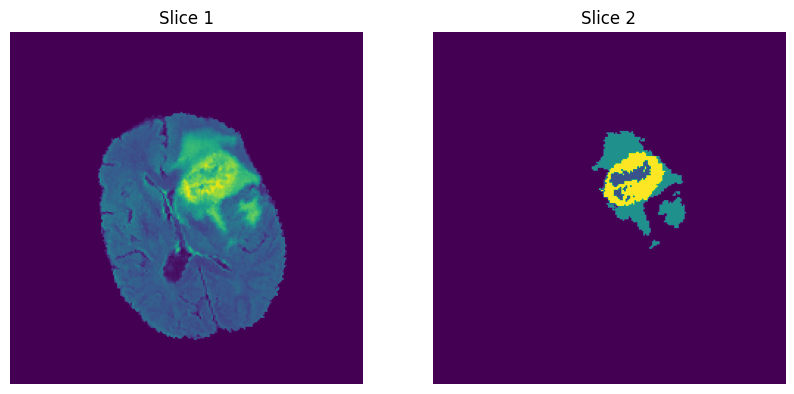

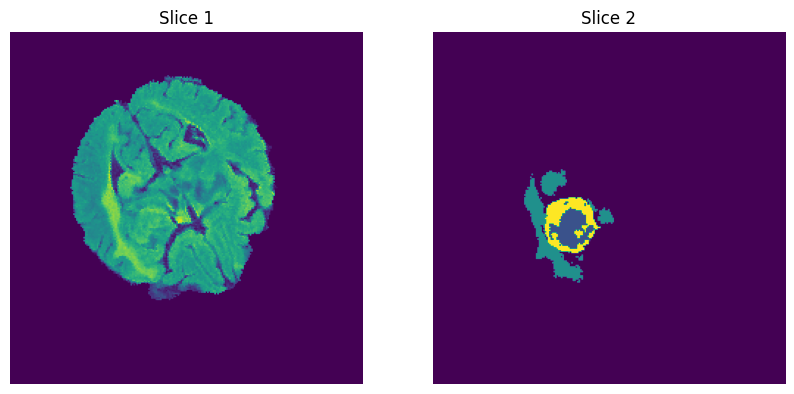

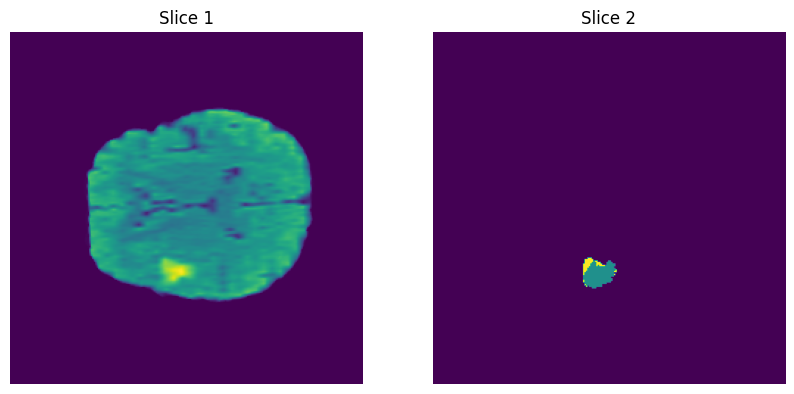

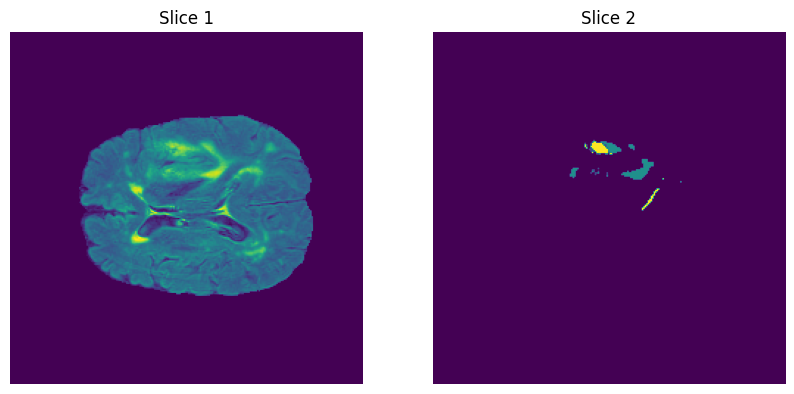

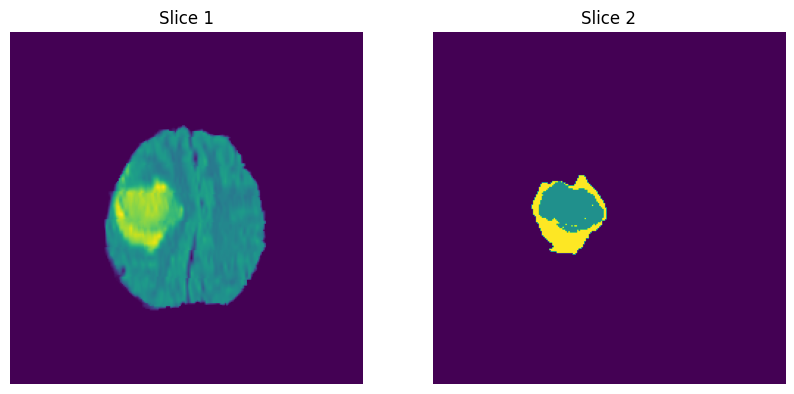

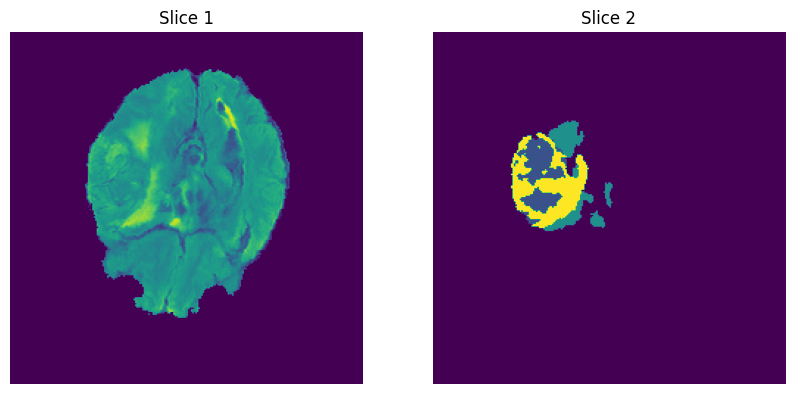

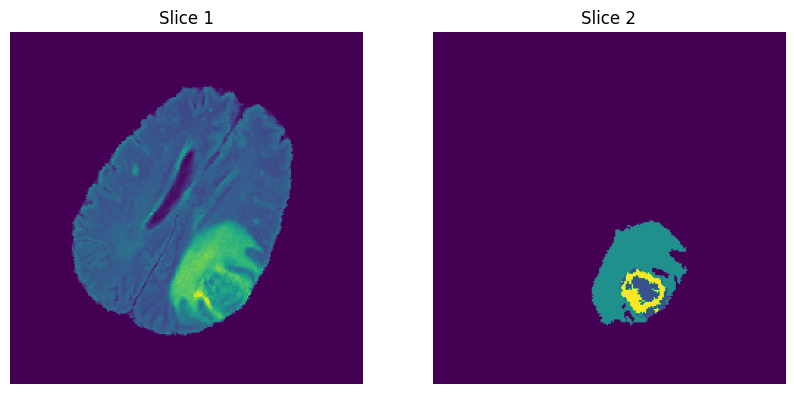

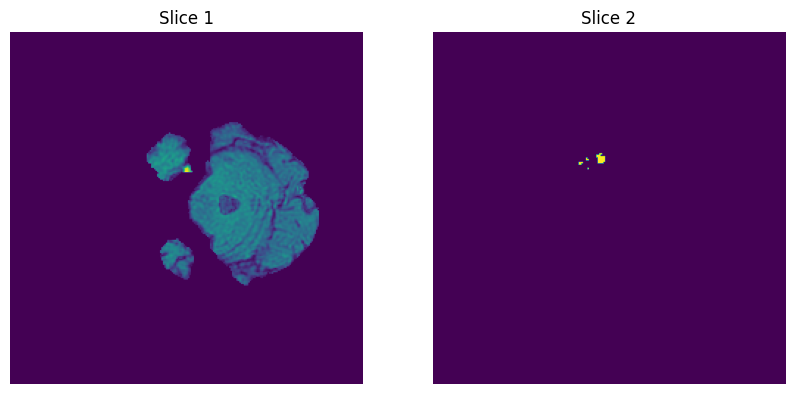

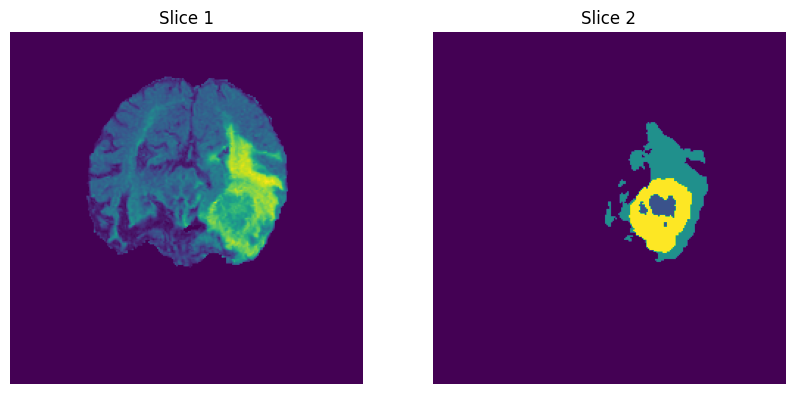

In [10]:
# visualise dataset
counter = 0
for slice in processed_training_set:
    if slice[1].max() != 0:
        counter += 1
        if counter % 10 == 0:
            display_slice(slice[0], slice[1], 'Slice 1', 'Slice 2')
        if counter == 100:
            break

In [11]:
training_custom_set = CustomDataset(processed_training_set)
validation_custom_set = CustomDataset(processed_validation_set)
testing_custom_set = CustomDataset(processed_testing_set)

batch_size = 20

training_dataloader = DataLoader(training_custom_set, batch_size = batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_custom_set, batch_size = batch_size, shuffle=True)
testing_dataloader = DataLoader(testing_custom_set, batch_size = batch_size ,shuffle=True)

In [12]:
print(next(iter(training_dataloader))[0].shape, next(iter(training_dataloader))[1].shape)

torch.Size([20, 4, 240, 240]) torch.Size([20, 1, 240, 240])


In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
model = UNet().to(device)
loss1 = dice_loss
loss2 = nn.BCEWithLogitsLoss()
epochs = 2

def combined_loss(y_pred, y_true):
    output = loss1(y_pred, y_true) + loss2(y_pred, y_true)
    return output

loss3 = combined_loss
optim = torch.optim.Adam(model.parameters(), lr=0.001)
feature_range = (1, 2)

We proceed to trains several different models, (saved in "saved_models" folders). 

These are the models being tested in order, you may uncomment them to train and test, (estimted 20 minutes on a M3 Max with MPS per epoch). 

We test in order: 

2 Epochs
1. Single Channel & dice_loss 
2. Single Channel & BCEwithLogitsLoss
3. Single Channel & Combined loss (dice_loss + BCEwithLogitsLoss)

5. 4 Channel & Combined Loss & LR = 0.001
6. 4 Channel & Combined Loss & LR = 0.01

After having evaluated the models with manual visualization using our app. We found that although The combined loss values are higher, the output of the model is closer to the actual mask. We also found that with the use LR = 0.01, we are constantly fluctuating which means the LR is too high and we are unable to reach the minimum. Hence we decided to use LR = 0.001

6. 4 Channel & Combined Loss & LR = 0.001 & 5 epochs (Final training)

Uncomment to test



```
1
```

In [15]:
# train_loss_dice, val_loss_dice = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                    optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss1, display_batch_loss=True, 
#                                    save_folder="Dice_Loss", epochs = epochs)

In [16]:
# plot_two_lines_same_x(train_loss_dice, val_loss_dice)

```
2
```

In [17]:
# train_loss_BCE, val_loss_BCE = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                            optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss2, 
#                                            display_batch_loss=True, save_folder="BCE_Loss", epochs=epochs)

In [18]:
# plot_two_lines_same_x(train_loss_BCE, val_loss_BCE)

```
3
```

In [19]:
# train_loss_Combined, val_loss_Combined = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                                      optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                      display_batch_loss=True, save_folder="Combined_loss", epochs=epochs)

In [20]:
# plot_two_lines_same_x(train_loss_Combined, val_loss_Combined)

In [21]:
# model_multi_channel = UNet(in_channels=4).to(device)
# optim_multi_channel = torch.optim.Adam(model_multi_channel.parameters(), lr=0.001)
# feature_range = (0,4)


```
4
```


In [22]:
# train_loss_multi_combined_0001, val_loss_multi_combined_0001 = train_model(model_multi_channel, train_dataloader=training_dataloader, 
#                                                                            val_dataloader=validation_dataloader, optimizer=optim_multi_channel,
#                                                                            feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                                            display_batch_loss=True, save_folder="multi_channel_combined_lr0001", 
#                                                                            epochs = epochs)

In [23]:
# plot_two_lines_same_x(train_loss_multi_combined_0001, val_loss_multi_combined_0001)

```
5
```

In [24]:
# model_multi_channel = UNet(in_channels=4).to(device)
# optim_multi_channel = torch.optim.Adam(model_multi_channel.parameters(), lr=0.01)

# train_loss_multi_combined_001, val_loss_multi_combined_001 = train_model(model_multi_channel, train_dataloader=training_dataloader, 
#                                                                          val_dataloader=validation_dataloader, optimizer=optim_multi_channel,
#                                                                          feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                                          display_batch_loss=True, save_folder="multi_channel_combined_lr001",
#                                                                          epochs = epochs)

In [25]:
# plot_two_lines_same_x(train_loss_multi_combined_001, val_loss_multi_combined_001)

```
6
```

In [26]:
# model_multi_channel_main = UNet(in_channels=4).to(device)
# optim_multi_channel_main = torch.optim.Adam(model_multi_channel_main.parameters(), lr=0.001)
# epochs = 5

In [27]:
# train_loss_multi_main, val_loss_multi_main = train_model(model_multi_channel_main, train_dataloader=training_dataloader, 
#                                                          val_dataloader=validation_dataloader, optimizer=optim_multi_channel_main,
#                                                          feature_range=feature_range, device = device, loss_fn = loss3, display_batch_loss=True, 
#                                                          save_folder="multi_channel_main", epochs=epochs)

In [ ]:
# plot_two_lines_same_x(train_loss_multi_main, val_loss_multi_main)